First, import needed modules

In [64]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
from shapely import wkt
from shapely.ops import unary_union

Initalize variables

In [65]:
shapely.speedups.enable()
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Load shapefile with municipality and state boundaries and plot it for inspection

<AxesSubplot:>

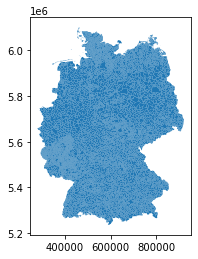

In [66]:
municipalities = gpd.read_file(f'{path}/data/geodata/VG250_GEM.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
municipalities.plot()

Inspect the dataframe: GEN has the municipalities' names, geometry are the polygons.


In [67]:
municipalities.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,DEBKG_ID,geometry
0,6,2,1,083355004002,08335002,083355004002,Allensbach,Gemeinde,64,gemeinschaftsangehörig,...,04,002,R,DE138,083355004002,08335002,2009-01-01,0,DEBKGDL20000HKND,"POLYGON ((507883.567 5282624.777, 507923.277 5..."
1,6,2,1,083355004066,08335066,083355004066,Reichenau,Gemeinde,64,gemeinschaftsangehörig,...,04,066,R,DE138,083355004066,08335066,2009-01-01,0,DEBKGDL20000HKNF,"MULTIPOLYGON (((508095.875 5281959.799, 508134..."
2,6,2,1,083350063063,08335063,083350063063,Radolfzell am Bodensee,Stadt,61,None,...,63,063,R,DE138,083350063063,08335063,2009-01-01,0,DEBKGDL20000HKNE,"POLYGON ((500719.668 5285290.972, 500632.566 5..."
3,6,2,1,010595990186,01059186,010595990186,Steinbergkirche,Gemeinde,64,gemeinschaftsangehörig,...,90,186,R,DEF0C,010595990186,01059186,2013-03-01,0,DEBKGDL20000XYFA,"POLYGON ((547082.162 6075557.922, 547528.602 6..."
4,6,2,1,033595407018,03359018,033595407018,Freiburg (Elbe),Gemeinde,64,gemeinschaftsangehörig,...,07,018,K,DE939,033595407018,03359018,2009-01-01,0,DEBKGDL20000QMG4,"POLYGON ((517934.141 5968832.380, 519053.640 5..."


Drop polygons which represent waterbodies

<AxesSubplot:>

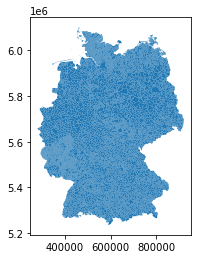

In [68]:
municipalities = municipalities[municipalities['GF'] == 4]
municipalities.plot()

The data use the European Terrestrial Reference System 1989 as coordinate reference system (CRS), units are metres

In [69]:
municipalities.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Load shapefiles with power lines, start and endpoints

In [70]:
powerlines = gpd.read_file(f'{path}/data/geodata/powerlines.shp')
startpoints = gpd.read_file(f'{path}/data/geodata/startpoints.shp')
endpoints = gpd.read_file(f'{path}/data/geodata/endpoints.shp')
startpoints.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As the CRS of the powerline dfs is EPSG 4326 (Degrees), convert to EPSG 25832 (Meters)

In [71]:
powerlines = powerlines.to_crs(epsg=25832)
startpoints = startpoints.to_crs(epsg=25832)
endpoints = endpoints.to_crs(epsg=25832)

Check CRS conversion

In [72]:
startpoints.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Plot for inspection

<AxesSubplot:>

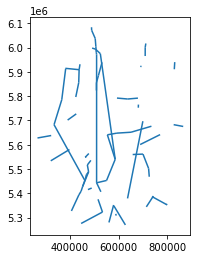

In [73]:
powerlines.plot()

Filter out Retrofitting projects

<AxesSubplot:>

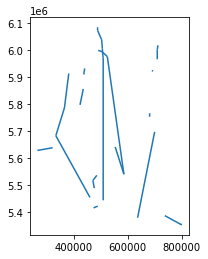

In [74]:
powerlines = powerlines[powerlines['New'] == 1]
startpoints = startpoints[startpoints['New'] == 1]
endpoints = endpoints[endpoints['New'] == 1]
powerlines.plot()

Combine municipalities and powerlines in a plot

In [75]:
powerlines.set_geometry('geometry')
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
powerlines.plot(ax=ax, color='red', lw=2, zorder=3)
'''
startpoints.plot(ax=ax, color='red', lw=1, zorder=4)
endpoints.plot(ax=ax, color='red', lw=0.5, zorder=5)

for x, y, label in zip(startpoints.geometry.x, startpoints.geometry.y, startpoints.Start):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=5)
for x, y, label in zip(endpoints.geometry.x, endpoints.geometry.y, endpoints.End):
    ax.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords="offset points", fontsize=5)
'''
plt.suptitle('BBPlG 2013 projects', fontsize=20)
plt.savefig(f'{path}/figures/BBPLG2013_projects.png')
plt.close()

Create buffers around the straight lines to create treatment indicator for different corridor widths

In [76]:
for buffer in (5, 10, 15, 25, 50):
    try:
        powerlines.insert(loc=len(powerlines.columns), column=f'geometry_{buffer*2}', value=0) #buffer is added on both sides -> x2 to simplify
    except Exception:
        pass
    powerlines[f'geometry_{buffer*2}'] = powerlines['geometry'].buffer(buffer*1000)
powerlines.rename(columns = {'geometry':'geometry_0'}, inplace = True)
powerlines.head()

,#BBPlG2013,Start,End,New,Retro,geometry_0,geometry_10,geometry_20,geometry_30,geometry_50,geometry_100
0,None,Emden-Borssum,"52.20189, 7.03448",1.0,NaN,"LINESTRING (381802.135 5912655.617, 365771.558...","POLYGON ((370732.460 5784598.070, 370647.403 5...","POLYGON ((375693.362 5783974.011, 375523.248 5...","POLYGON ((380654.264 5783349.951, 380399.094 5...","POLYGON ((390576.068 5782101.831, 390150.785 5...","POLYGON ((415380.578 5778981.532, 414530.012 5..."
1,None,"52.20189, 7.03448",Osterath,1.0,NaN,"LINESTRING (365771.558 5785222.130, 334024.420...","POLYGON ((338801.725 5680963.097, 338634.089 5...","POLYGON ((343579.031 5679487.512, 343243.757 5...","POLYGON ((348356.336 5678011.926, 347853.426 5...","POLYGON ((357910.947 5675060.755, 357072.763 5...","POLYGON ((381797.474 5667682.827, 380121.107 5..."
2,None,Osterath,Philippsburg,1.0,NaN,"LINESTRING (334024.420 5682438.683, 460302.514...","POLYGON ((464678.801 5456336.019, 464894.761 5...","POLYGON ((469055.088 5458754.306, 469487.009 5...","POLYGON ((473431.375 5461172.593, 474079.257 5...","POLYGON ((482183.949 5466009.166, 483263.752 5...","POLYGON ((504065.385 5478100.600, 506224.990 5..."
3,None,Brunsbüttel,Großgartach,1.0,NaN,"LINESTRING (509169.440 5972099.313, 509180.155...","POLYGON ((514180.155 5443309.268, 514156.089 5...","POLYGON ((519180.155 5443309.369, 519132.023 5...","POLYGON ((524180.155 5443309.470, 524107.956 5...","POLYGON ((534180.155 5443309.673, 534059.823 5...","POLYGON ((559180.155 5443310.180, 558939.491 5..."
4,None,Wilster,Grafenrheinfeld,1.0,NaN,"LINESTRING (524519.730 5975050.664, 585751.695...","POLYGON ((590702.910 5540628.600, 590747.363 5...","POLYGON ((595654.125 5541325.358, 595743.030 5...","POLYGON ((600605.340 5542022.116, 600738.698 5...","POLYGON ((610507.769 5543415.632, 610730.033 5...","POLYGON ((635263.843 5546899.423, 635708.371 5..."


Now generate treatment indicators for all buffer sizes

In [77]:
for buffer in (0, 5, 10, 15, 25, 50):
    try:
        municipalities.insert(loc=len(municipalities.columns), column=f'treated_{buffer*2}', value=0)
    except Exception:
        pass
    for i in range(len(municipalities)):
        # this sets treated_x == True, if powerline intersects a municipality
        municipalities.loc[municipalities.index[i], f'treated_{buffer*2}'] = any(powerlines[f'geometry_{buffer*2}'].intersects(municipalities['geometry'].values[i]))
municipalities.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,WSK,EWZ,DEBKG_ID,geometry,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
132,6,4,1,084375006105,08437105,084375006105,Sigmaringendorf,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,3579,DEBKGDL20000E1A1,"MULTIPOLYGON (((519739.281 5326044.596, 519836...",False,False,False,False,False,False
133,6,4,1,084355004010,08435010,084355004010,Daisendorf,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,1567,DEBKGDL20000DXY9,"POLYGON ((520024.250 5285171.532, 520282.129 5...",False,False,False,False,False,False
134,6,4,1,084265001036,08426036,084265001036,Dürnau,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,416,DEBKGDL20000E2FC,"POLYGON ((539650.245 5323326.647, 540371.109 5...",False,False,False,False,False,False
135,6,4,1,084365003079,08436079,084365003079,Waldburg,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,3097,DEBKGDL20000DWDG,"POLYGON ((555188.210 5292814.174, 555101.559 5...",False,False,False,False,False,False
136,6,4,1,084365001053,08436053,084365001053,Königseggwald,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,663,DEBKGDL20000DYBW,"MULTIPOLYGON (((529968.394 5308622.822, 530000...",False,False,False,False,False,False


In [78]:
print(municipalities['treated_0'].describe())

count     11379
unique        2
top       False
freq      10826
Name: treated_0, dtype: object


Set treatment = False if municipality is a start- or endpoint

In [79]:
for buffer in (0, 5, 10, 15, 25, 50):
    for i in range(len(municipalities)):
        # this sets treated_x == False if municipality contains a start- or endpoint
        if any(startpoints['geometry'].within(municipalities['geometry'].values[i])):
            municipalities.loc[municipalities.index[i], f'treated_{buffer*2}'] == False
        elif any(endpoints['geometry'].within(municipalities['geometry'].values[i])):
            municipalities.loc[municipalities.index[i], f'treated_{buffer*2}'] == False

In [80]:
print(municipalities['treated_0'].describe())

count     11379
unique        2
top       False
freq      10826
Name: treated_0, dtype: object


Export treatment dataset from municipalities dataframe

In [81]:
treatment = pd.DataFrame(municipalities)
treatment = treatment.reindex(columns=['AGS', 'GEN', 'treated_0', 'treated_10', 'treated_20', 'treated_30', 'treated_50', 'treated_100'])
treatment = treatment.set_index('AGS')
treatment = treatment.replace({True:1, False:0})
treatment.to_csv(f'{path}/data/treatment.csv', encoding = 'utf-8-sig')
treatment.head()

,GEN,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
AGS,,,,,,,
08437105,Sigmaringendorf,0,0,0,0,0,0
08435010,Daisendorf,0,0,0,0,0,0
08426036,Dürnau,0,0,0,0,0,0
08436079,Waldburg,0,0,0,0,0,0
08436053,Königseggwald,0,0,0,0,0,0


Plot the municipalities that directly intersect with a powerline

In [82]:
powerlines = powerlines.set_geometry('geometry_0')
municipalities_intersected = municipalities[municipalities['treated_0'] == True] #drops all untreated munipalities
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities_intersected.plot(ax=ax, color='orange', edgecolor='darkorange', lw=0.01, zorder=3)
powerlines.plot(ax=ax, color='red', lw=2, zorder=4)
plt.suptitle('Municipalities affected by BBPlG 2013 projects', fontsize=20)
plt.title('direct line', fontsize=14)
plt.savefig(f'{path}/figures/BBPLG2013_treated_0.png')
plt.close()

Plot the municipalities that intersect with a powerline 50 km buffer

In [83]:
powerlines.set_geometry('geometry_50')
municipalities_intersected50 = municipalities[municipalities['treated_50'] == True] #drops all untreated munipalities
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', zorder=1)
states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
municipalities_intersected50.plot(ax=ax, color='orange', edgecolor='darkorange', lw=0.01, zorder=3)
powerlines.plot(ax=ax, color='red', lw=2, zorder=4)
plt.suptitle('Municipalities affected by BBPlG 2013 projects', fontsize=20)
plt.title('with a 50km buffer', fontsize=14)
plt.savefig(f'{path}/figures/BBPLG2013_treated_50.png')
plt.close()